In [1]:
import pandas as pd

1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.


In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
alunos = pd.read_csv(url,sep=',')

In [3]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.


In [4]:
alunos.head(5)


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [5]:
alunos.tail(7)

,Nome,Idade,Notas,Aprovado
11,Igor,24,4.5,False
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


3) Confira a quantidade de linhas e colunas desse DataFrame.


In [6]:
alunos.shape


(18, 4)

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.



In [7]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

Extra: Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [8]:
alunos.isnull().sum()
alunos = alunos.fillna(0)

In [9]:
alunos_a_remover = alunos.query('Nome == "Alice" | Nome == "Carlos"').index

In [10]:
alunos.drop(alunos_a_remover,axis=0, inplace=True)

In [11]:
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [12]:
alunos_aprovados = alunos.query('Aprovado == True')
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [13]:
alunos_aprovados.to_csv('alunos_aprovados.csv', sep=';', index = False)
pd.read_csv('alunos_aprovados.csv', sep=';')


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


In [14]:
alunos['Notas'].replace(7,8, inplace=True)
alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,8.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.


In [23]:
alunos['Pontos_extras'] = ((alunos['Notas'] * 40) / 100 )


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.


In [27]:
alunos['Notas_finais'] = (alunos['Notas'] + alunos['Pontos_extras'])
alunos


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,8.0,True,3.2,11.2
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3



3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [32]:
alunos['Aprovado_final'] = alunos['Notas_finais'].apply(lambda x: True if x >= 6 else False)
alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,8.0,True,3.2,11.2,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


 4 - Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [33]:
alunos_aprovados_posteriormente = alunos.query('Aprovado == False &  Aprovado_final == True')
alunos_aprovados_posteriormente

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True


# O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:


1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [15]:
url_imoveis =  'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url_imoveis,sep=';')

In [16]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial',
          'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
        'Pousada/Chalé', 'Hotel', 'Indústria', 'Box/Garagem','Sítio','Terreno Padrão'
]

In [17]:
lista_comerciais = dados.query('@imoveis_comerciais in Tipo')
lista_residencias = dados.query('@imoveis_comerciais not in Tipo')
lista_residencias.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [18]:
apartamentos = lista_residencias.query('Tipo == "Apartamento"')
apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [19]:
media_quartos = apartamentos['Quartos'].mean()
media_quartos

2.481568707761622

In [20]:
bairros_unicos = apartamentos['Bairro'].nunique()
bairros_unicos

149

In [21]:
media_aluguel_bairro = apartamentos.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)
media_aluguel_bairro
cincos_primeiros_bairros = media_aluguel_bairro.head()
cincos_primeiros_bairros


Bairro
Joá              15500.000000
Arpoador         12429.769231
Cidade Jardim    12000.000000
Ipanema           9487.205317
Botafogo          9369.207116
Name: Valor, dtype: float64

<Axes: xlabel='Média de preço', ylabel='Nome'>

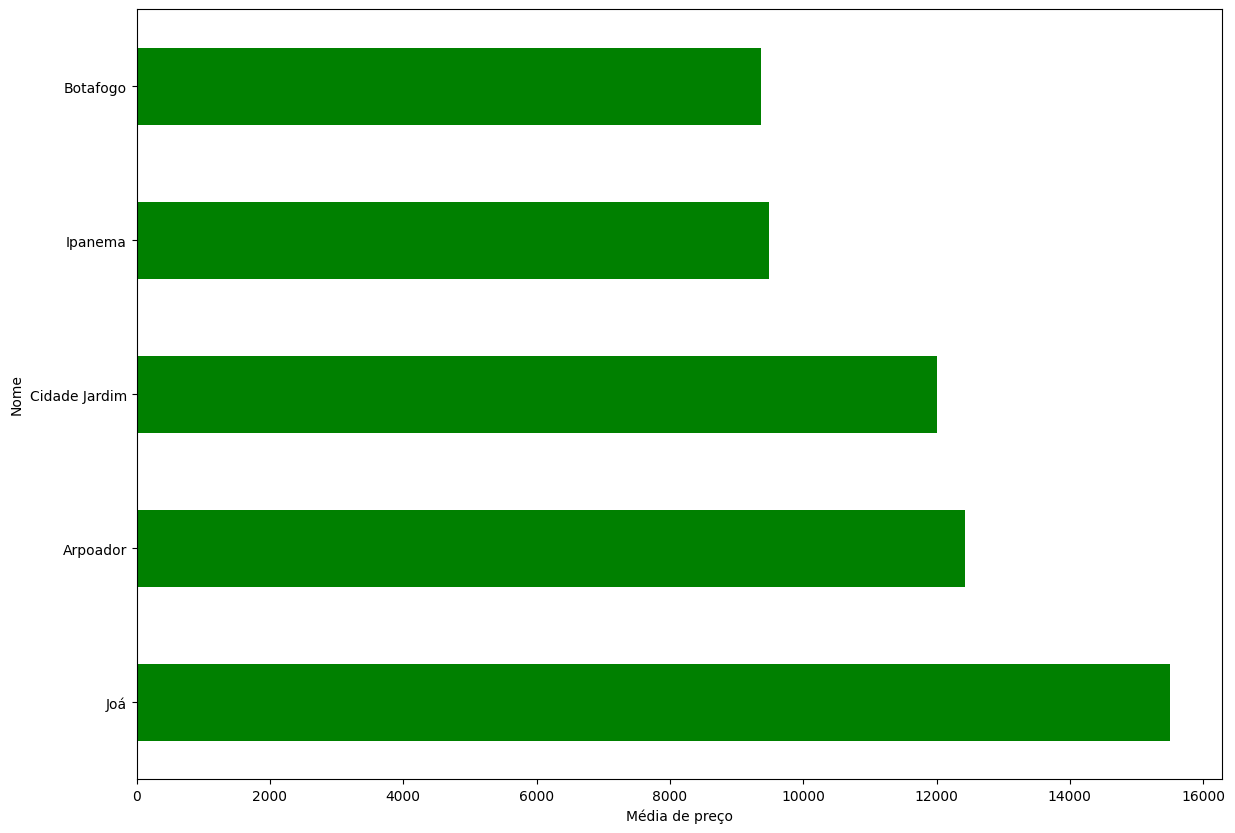

In [22]:

cincos_primeiros_bairros.plot(kind='barh', figsize=(14,10), color = 'green',xlabel = 'Média de preço', ylabel = 'Nome')